In [1]:
%%capture
import hc_lib.plots.figlib as flib
flib.siteFG()
from figrid.figrid import DataList
from figrid.figrid import Figrid
import numpy as np
import copy
import matplotlib as mpl

In [2]:
box = 'tng100'
snap = [99, 67]
axis = 0
res = 800
files = ['hiptlXgalaxy', 'vnXgalaxy']
master = DataList()
for f in files:
    for s in snap:
        rlib = flib.load(box, s, axis, res, f)
        kmin = (np.abs(rlib.results['pk'][0].xvalues - 2)).argmin()
        master.loadResults(rlib.results['pk'])
print(kmin)

22


In [3]:
smfont = 10
larfont = 12
BOX = rlib.results['pk'][0].props['box']
RES = rlib.results['pk'][0].props['grid_resolution']
cdict = flib.getCdict()
XBORDER, YBORDER = flib.getBorders()
XLIM = flib.getXlim()

In [6]:
def space_compare(ip, name):
    print('COMPARING SPACES')
    withall = 'resolved' in ip['color']
    dl = DataList(copy.deepcopy(master.getMatching(ip)))
    rsd = flib.makeRSD(dl)
    rsddl = DataList(rsd)
    fgrsd = Figrid(rsddl)
    fgrsd.arrange(['ratio'],[], panel_length = 2)
    fkw = {}
    fkw['label'] = 'HI-Blue Galaxy\nCross-Power'
    fkw['color'] = cdict['blue']
    fkw['alpha'] = 0.45
    fgrsd.makeFills({'color':'blue'}, fkw)
    fkw['label'] = 'HI-Red Galaxy\nCross-Power'
    fkw['color'] = cdict['red']
    fgrsd.makeFills({'color':'red'}, fkw)
    if withall:
        fkw['label'] = 'HI-Galaxy\nCross-Power'
        fkw['color'] = cdict['resolved']
        fgrsd.makeFills({'color':'resolved'}, fkw)

    dl = DataList(copy.deepcopy(master.getMatching(ip)))
    fg = Figrid(dl)
    if withall:
        fg.setColOrder(['blue', 'red', 'resolved'])
    else:
        fg.setColOrder(['blue', 'red'])
    fg.arrange('color', '', panel_length = 2, hspace = 0.05, xborder = XBORDER, yborder = YBORDER)
    fg.combineFigrids(fgrsd)
    pargs = {}
    pargs['label'] = 'Redshift Space'
    pargs['color'] = cdict['real']
    pargs['alpha'] = 0.65
    fg.makeFills({'space':'real'}, pargs)
    pargs['label'] = 'Real Space'
    pargs['color'] = cdict['redshift']
    fg.makeFills({'space':'redshift'}, pargs)
    fg.plot()
    pkslc = (slice(0,fg.dim[0]-1), slice(None))
    # fix the axes
    axparams = {}
    # flib.setNyq(fg, kmin, RES, BOX)
    axparams['xscale'] = 'log'
    axparams['ylim'] = [0, 1.75]
    axparams['xlim'] = XLIM
    fg.setAxisParams(axparams)
    axparams['yscale'] = 'log'
    axparams['ylim'] = [0.1, 1e4]
    fg.setAxisParams(axparams, slc=pkslc)
    fg.setDefaultTicksParams()
    fg.setTicks({'labelsize':smfont, 'direction':'in'})
    kw = {'fontsize':larfont}
    ypos = [fg.xborder[0] * 0.1 / fg.figsize[0], 
            1 - (0.5*(np.sum(fg.panel_heights[:-1]) + np.sum(fg.hspace[:fg.dim[1] - 2]) + fg.yborder[0])) / fg.figsize[1]]
    flib.pklabels(fg, ysub = r'\rm{HI $\times$ gal}', ypos = ypos, xtxtkw = kw, ytxtkw = kw)
    txtkw = {}
    txtkw['ha'] = 'center'
    txtkw['va'] = 'top'
    txtkw['fontsize'] = smfont
    if withall:
        fg.setRowLabels([r'HI $\times$ Blue', r'HI $\times$ Red', r'HI $\times$ All', 'Redshift Space\nDistortions'], [0.5, 0.95],
                    txtkw)
    else:
        fg.setRowLabels(['Blue Galaxies', 'Red Galaxies', 'Redshift Space\nDistortions'], [0.5, 0.95],
            txtkw)
    
    fg.makeYLabel(r'P$_{\rm{s}}$ (k) / P$_{\rm{r}}$ (k)', 
                [ypos[0], (0.5 * fg.panel_heights[-1] + fg.yborder[1]) / fg.figsize[1]], 
                {'va':'center', 'fontsize':larfont})
    lkw = {'frameon':False, 'fontsize':smfont - 1, 'loc':'lower left'}
    fg.drawLegend(lkw, (0,0))
    lkw['loc'] = 'center right'
    
    #fg.drawLegend(lkw, (fg.dim[0]-1,0))

    fcolors = np.empty(fg.dim, dtype = object)
    trgba = mpl.colors.to_rgba
    alpha = 0.15
    if withall:
        fcolors[:,0] = [trgba(cdict['blue'], alpha), trgba(cdict['red'], alpha), trgba(cdict['resolved'], alpha), trgba('white', alpha)]
    else:
        fcolors[:,0] = [trgba(cdict['blue'], alpha), trgba(cdict['red'], alpha), trgba('white', alpha)]
    flib.setFacecolor(fg, fcolors)
    flib.plotOnes(fg, (fg.dim[0]-1,0))
#     fg.fig.show()
    fg.save(name)
    return

In [7]:
%%capture
withall = ['red', 'blue', 'resolved']
noall = ['red', 'blue']

for a in [withall, noall]:
    for ss in [99, 67]:

        isall = a is withall
        if isall:
            allstr = 'withall'
        else:
            allstr = 'noall'

        name = 'space_%s_%03d.png'%(allstr, ss)

        ip = {}
        ip['snapshot'] = ss
        ip['color'] = a
        
        space_compare(ip, name)
        

ValueError: 
_{\rm{HI 
     ^
Expected {snowflake | accent | symbol | c_over_c | function | group | frac | dfrac | stackrel | binom | genfrac | sqrt | overline | operatorname}, found '{'  (at char 5), (line:1, col:6)

ValueError: 
_{\rm{HI 
     ^
Expected {snowflake | accent | symbol | c_over_c | function | group | frac | dfrac | stackrel | binom | genfrac | sqrt | overline | operatorname}, found '{'  (at char 5), (line:1, col:6)

ValueError: 
_{\rm{HI 
     ^
Expected {snowflake | accent | symbol | c_over_c | function | group | frac | dfrac | stackrel | binom | genfrac | sqrt | overline | operatorname}, found '{'  (at char 5), (line:1, col:6)

COMPARING SPACES
The row values for ['ratio']: ['no key found']
The column values for []: []
The row values for ['color']: ['blue', 'red']
The column values for ['']: ['no key found']
[0.1 0.1]
[]


ValueError: 
_{\rm{HI 
     ^
Expected {snowflake | accent | symbol | c_over_c | function | group | frac | dfrac | stackrel | binom | genfrac | sqrt | overline | operatorname}, found '{'  (at char 5), (line:1, col:6)

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x149f3981a680> (for post_execute):


ValueError: 
_{\rm{HI 
     ^
Expected {snowflake | accent | symbol | c_over_c | function | group | frac | dfrac | stackrel | binom | genfrac | sqrt | overline | operatorname}, found '{'  (at char 5), (line:1, col:6)

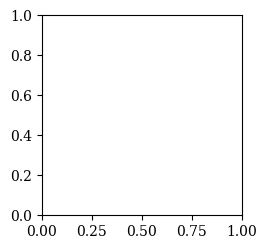

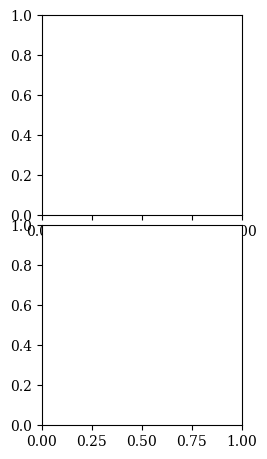

ValueError: 
_{\rm{HI 
     ^
Expected {snowflake | accent | symbol | c_over_c | function | group | frac | dfrac | stackrel | binom | genfrac | sqrt | overline | operatorname}, found '{'  (at char 5), (line:1, col:6)

<Figure size 360x800 with 3 Axes>

In [8]:
space_compare({'snapshot':99, 'color':noall}, 'space_comparison_FINAL.pdf')


In [ ]:
def zevo_space(ip, savename):
    withall = 'resolved' in ip['color']
    dc_list = DataList(copy.deepcopy(master.getMatching(ip)))
    rsd = flib.makeRSD(dc_list)
    dc_list.dclist.extend(rsd)
    fg = Figrid(dc_list)
    fg.setRowOrder(['real', 'redshift', 'rsd'])
    if withall:
        colorder = ['blue', 'red', 'resolved']
    else:
        colorder = ['blue', 'red']
    fg.setColOrder(colorder)
    XBORDER[0] = 0.35
    YBORDER[1] = 0.35
    fg.arrange('space', 'color', panel_length = 2, wspace = 0, hspace = 0.075,
               xborder = XBORDER, yborder = YBORDER)
    
    fkw = {}
    fkw['alpha'] = 0.55
    zcols = cdict['zevo']
    for cv in fg.colValues:
        if cv in zcols:
            fkw['label'] = 'z=0.0'
            fkw['color'] = zcols[cv][0]
            fg.makeFills({'snapshot':99, 'color':cv}, fkw)
            fkw['label'] = 'z=0.5'
            fkw['color'] = zcols[cv][1]
            fg.makeFills({'snapshot':67, 'color':cv}, fkw)


    fg.plot()

    realslc = (slice(0,1), slice(None))
    redshiftslc = (slice(1,2), slice(None))
    # fix the axes
    axparams = {}
    # flib.setNyq(fg, kmin, RES, BOX)
    axparams['xscale'] = 'log'
    axparams['ylim'] = [0, 1.5]
    axparams['xlim'] = XLIM
    fg.setAxisParams(axparams)
    axparams['yscale'] = 'log'
    axparams['ylim'] = [0.1, 1e4]
    fg.setAxisParams(axparams, slc=redshiftslc)
    axparams['ylim'] = [10, 1e4]
    fg.setAxisParams(axparams, slc=realslc)
    # fix the tick labels
    fg.setDefaultTicksParams()
    fg.setTicks({'labelsize':smfont, 'direction':'in'})
    # labels
    kw = {'fontsize':larfont}
    ypos = [fg.xborder[0] * 0.1 / fg.figsize[0], 
            1 - (0.5*(np.sum(fg.panel_heights[:-1]) + np.sum(fg.hspace[:fg.dim[1] - 2]) + fg.yborder[0])) / fg.figsize[1]]
    flib.pklabels(fg, ysub = r'\rm{HIXgal}', ypos = ypos, xtxtkw = kw, ytxtkw = kw)
    txtkw = {}
    txtkw['ha'] = 'center'
    txtkw['va'] = 'top'
    txtkw['fontsize'] = smfont
    fg.setRowLabels(['Real Space', 'Redshift Space', 'Redshift Space\nDistortions'], [0.5, 0.95],
                txtkw)
    txtkw['ha'] = 'left'
    txtkw['va'] = 'bottom'
    if withall:
        collabels = ['Blue Galaxies', 'Red Galaxies', 'All Galaxies']
    else:
        collabels = ['Blue Galaxies', 'Red Galaxies']
    fg.setColLabels(collabels, [0.05, 0.05], txtkw)
    fg.makeYLabel(r'P$_{\rm{s}}$ (k) / P$_{\rm{r}}$ (k)', 
                [ypos[0], (0.5 * fg.panel_heights[-1] + fg.yborder[1]) / fg.figsize[1]], 
                {'va':'center', 'ha':'left','fontsize':larfont})
    lkw = {'frameon':False, 'fontsize':smfont - 1, 'loc':'lower left'}
    fg.drawLegend(lkw, (1,1))
    lkw['loc'] = 'center right'
    fg.drawLegend(lkw, (2,0))
    # fcolors = np.empty(fg.dim, dtype = object)
    # trgba = mpl.colors.to_rgba
    # alpha = 0.15
    for i in range(fg.dim[1]):
        flib.plotOnes(fg, (2, i))
    # fcolors[:,0] = [trgba('blue', alpha), trgba('red', alpha), trgba('white')]
    # flib.setFacecolor(fg, fcolors)
    fg.save(savename)
    return

In [ ]:
%%capture
for a in [withall, noall]:
    isall = a is withall
    if isall:
        allstr = 'withall'
    else:
        allstr = 'noall'

    name = 'space_zevo_%s.png'%(allstr)

    ip = {}
    ip['color'] = a
    
    zevo_space(ip, name)
zevo_space({'color':noall}, 'space_zevo_FINAL.pdf') 

The row values for ['space']: ['real', 'redshift', 'rsd']
The column values for ['color']: ['blue', 'red', 'ratio']
used filter
used filter
used filter
used filter


Text(0.5, 0.95, 'HI $\\times$ Red RSD')

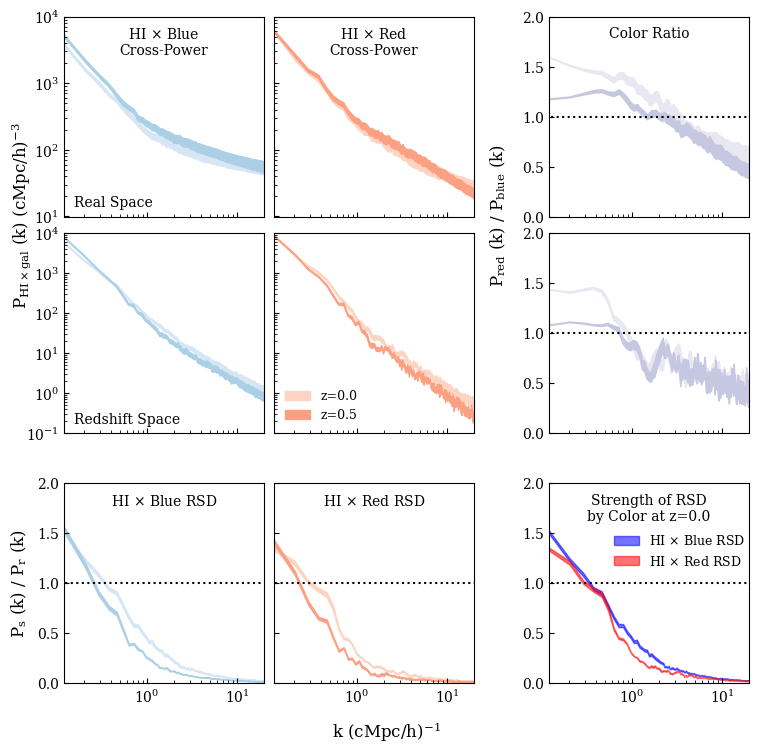

In [15]:
from scipy.signal import savgol_filter
def _smooth(ax, data, kwargs):
    data = np.array(data)
    x = data[0, :]
    print('used filter')
    polyorder = 4
    window_length = 9
    cutidx = 11
    ymin = savgol_filter(data[1, :], window_length, polyorder)
    ymax = savgol_filter(data[2, :], window_length, polyorder)
#     minplt = np.zeros_like(x)
#     maxplt = np.zeros_like(x)
#     minplt[:cutidx] = data[1, :cutidx]
#     maxplt[:cutidx] = data[2, :cutidx]
#     minplt[cutidx:] = ymin
#     maxplt[cutidx:] = ymax
    ax.fill_between(x, ymin, ymax, **kwargs)      
    return
ip = {'color':['red', 'blue'], 'gal_res':'diemer', 'gal_species':'stmass', 'is_auto':False}
rbonly = DataList(master.getMatching(ip))
rsdratios = flib.makeRSD(rbonly)
rbonly.extend(rsdratios)
rvbratios = flib.makeBlueRedRatio(rbonly)
rbonly.extend(rvbratios)

ip['snapshot'] = 99
dl = DataList(copy.deepcopy(master.getMatching(ip)))
rsd = flib.makeRSD(dl)
rsddl = DataList(rsd)
# for dc in rsddl.dclist:
#     dc.add('snapshot':'nono')

rsddl.makeFill({'color':'blue'}, {'color':'blue', 'label':'HI $\\times$ Blue RSD', 'alpha':0.55})
rsddl.makeFill({'color':'red'}, {'color':'red', 'label':'HI $\\times$ Red RSD', 'alpha':0.55})
fg = Figrid(rbonly)
spacing = 0.05
fg.arrange('space', 'color', panel_length = 2, xborder = XBORDER,
        yborder = YBORDER, wspace = np.array([spacing,spacing*7.5]), hspace = np.array([spacing *1.65,spacing*5]))
fg.panels[2,2] = rsddl
fkw = {}
fkw['alpha'] = 1
zcols = cdict['zevo']

for cv in fg.colValues:
    if cv in zcols:
        slices = [(i, slice(None)) for i in range(2)]
        slices.append((2, slice(0, 2)))
#         mask = np.ones(fg.dim, dtype = bool)
#         mask[2,2] = False
        for slc in slices:
            fkw['label'] = 'z=0.0'
            fkw['color'] = zcols[cv][0]
            fg.makeFills({'snapshot':99, 'color':cv}, fkw, slc = slc)
            fkw['label'] = 'z=0.5'
            fkw['color'] = zcols[cv][1]
            fg.makeFills({'snapshot':67, 'color':cv}, fkw, slc = slc)
# fg.setPlotArgs({'snapshot':99, 'color':'blue', 'flib_process':'fill'}, {'label':'z=0.0 HI-Blue\nCross Power'}, slc = (2,2))
# fg.setPlotArgs({'snapshot':99, 'color':'red', 'flib_process':'fill'}, {'label':'z=0.0 HI-Red\nCross Power'}, slc = (2,2))
fg.setFunc({'color':'ratio', 'figrid_process':'fill'}, _smooth)
# print(fg.panels[1, 2].getAttrVals('figrid_process'))
fg.panels[2,2] = rsddl
fg.plot()
for i in range(3):
    flib.plotOnes(fg, (i, 2))
for j in range(2):
    flib.plotOnes(fg, (2, j))

axkw = {'xlim':XLIM, 'xscale':'log'}
fg.setAxisParams(axkw)
fg.setAxisParams({'yscale':'log'}, slc = (slice(0,2), slice(0,2)))
fg.setAxisParams({'ylim':[10, 1e4]}, slc = (0, slice(0,2)))
fg.setAxisParams({'ylim':[0.1, 1e4]}, slc = (1, slice(0, 2)))
fg.setAxisParams({'ylim':[0, 2]}, slc = (2, slice(0,2)))
fg.setAxisParams({'ylim':[0, 2]}, slc = (slice(0,3), 2))

fg.setTicks({'labelsize':smfont, 'direction':'in'})
fg.setTicks({'labelbottom':False}, 'x', slc = (slice(0,2), slice(0,3)))
fg.setTicks({'labelleft':False}, 'y', slc = (slice(0, 3), 1))
fg.setRowLabels(['Real Space', 'Redshift Space', ''], [0.05, 0.05])
fg.setColLabels(['HI $\\times$ Blue\nCross-Power', 'HI $\\times$ Red\nCross-Power', 'Color Ratio'], [0.5, 0.95], {'ha':'center', 'va':'top'})

fg.makeXLabel('k (cMpc/h)$^{-1}$', [], {'fontsize':larfont})
ypos = [fg.xborder[0] * 0.1 / fg.figsize[0], 
        1 - (0.5*(np.sum(fg.panel_heights[:-1]) + np.sum(fg.hspace[:fg.dim[1] - 2]) + fg.yborder[0])) / fg.figsize[1]]
fg.makeYLabel(r'P$_{\rm{HI} \times \rm{gal}}$ (k) (cMpc/h)$^{-3}$', ypos, {'va':'center', 'ha':'left','fontsize':larfont})
fg.makeYLabel(r'P$_{\rm{s}}$ (k) / P$_{\rm{r}}$ (k)', 
            [ypos[0], (0.5 * fg.panel_heights[-1] + fg.yborder[1]) / fg.figsize[1]], 
            {'va':'center', 'ha':'left','fontsize':larfont})
ypos = [(fg.xborder[0] + np.sum(fg.panel_widths[:2]) + fg.wspace[0] + fg.wspace[1]*0.2) / fg.figsize[0], 
        1 - (0.5*(np.sum(fg.panel_heights[:-1]) + np.sum(fg.hspace[:fg.dim[1] - 2]) + fg.yborder[0])) / fg.figsize[1]]
# ypos = [(fg.xborder[0] + np.sum(fg.panel_widths[:2]) + fg.wspace[0] + fg.wspace[1]*0.2) / fg.figsize[0], 
#         0.5]
fg.makeYLabel(r'P$_{\rm{red}}$ (k) / P$_{\rm{blue}}$ (k)', ypos, {'va':'center', 'ha':'left','fontsize':larfont})
# fg.makeYLabel(r'RSD$_{\rm{red}}$ (k) / RSD$_{\rm{blue}}$ (k)', 
#             [ypos[0], (0.5 * fg.panel_heights[-1] + fg.yborder[1]) / fg.figsize[1]], 
#             {'va':'center', 'ha':'left','fontsize':larfont})
lkw = {'frameon':False, 'fontsize':smfont - 1, 'loc':'lower left'}
fg.drawLegend(lkw, slc = (1,1))
lkw['loc'] = [0.3, 0.55]
fg.drawLegend(lkw, slc = (2,2))
fg.axes[2,2].text(0.5, 0.95, 'Strength of RSD\nby Color at z=0.0', va = 'top', ha = 'center',
                 fontsize = smfont, transform=fg.axes[2,2].transAxes)
fg.axes[2,0].text(0.5, 0.95, 'HI $\\times$ Blue RSD', va = 'top', ha = 'center',
                 fontsize = smfont, transform = fg.axes[2,0].transAxes)
fg.axes[2,1].text(0.5, 0.95, 'HI $\\times$ Red RSD', va = 'top', ha = 'center',
                 fontsize = smfont, transform = fg.axes[2,1].transAxes)

In [16]:
fg.save("z-evo_space_compare_combined.pdf")